<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice.png' width=300/></center>

# 데이터 전처리 기술 (2)

- 데이터 전처리에 필요한 기술을 다시 한 번 정리해 봅니다.

### 1. 환경 설정

- 필요한 라이브러리를 불러옵니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

- Jupyter Notebook 시각화에 한글이 표시되게 설정합니다.

In [2]:
# 라이브러리 불러오기
import matplotlib.font_manager as fm

# 폰트설정
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

### 2. 파일 읽어오기

- 처리할 데이터를 파일에서 읽어옵니다.

In [3]:
# Member.csv 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Member.csv'
member = pd.read_csv(path)

# Personal.csv 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Personal.csv'
personal = pd.read_csv(path)

# City.csv 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/City.csv'
city = pd.read_csv(path)

- 결과를 확인합니다.

In [4]:
# member 확인
member.head()

,MemberCD,CustomerCD,ClassCD,Score,CityCD
0,KT202201,CT1001,Bronze,7218,S
1,KT202202,CT1002,Gold,71235,C
2,KT202203,CT1003,Bronze,7889,S
3,KT202204,CT1004,Gold,53055,S
4,KT202205,CT1005,Bronze,8005,S


In [5]:
# personal 확인
personal.head()

,CustomerCD,CustomerName,Gender,Age,BirthDate
0,CT1001,"Braund, Mr. Owen Harris",male,32.0,1990-11-28
1,CT1002,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,48.0,1975-04-25
2,CT1003,"Heikkinen, Miss. Laina",female,36.0,1987-01-04
3,CT1004,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,45.0,1978-03-28
4,CT1005,"Allen, Mr. William Henry",male,45.0,1978-03-28


In [6]:
# city 확인
city.head()

,CityCD,CityName
0,S,Southhampton
1,C,Cherbourg
2,Q,Queenstown


### 3. 병합(=조인)

- 한 번에 두 데이터프레임만 병합할 수 있으므로 우선 member, personal을 CustomerCD를 기준으로 병합합니다.

In [7]:
# member, personal 병합
customer = pd.merge(member, personal, on='CustomerCD', how='inner')

# 확인
customer.head()

,MemberCD,CustomerCD,ClassCD,Score,CityCD,CustomerName,Gender,Age,BirthDate
0,KT202201,CT1001,Bronze,7218,S,"Braund, Mr. Owen Harris",male,32.0,1990-11-28
1,KT202202,CT1002,Gold,71235,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,48.0,1975-04-25
2,KT202203,CT1003,Bronze,7889,S,"Heikkinen, Miss. Laina",female,36.0,1987-01-04
3,KT202204,CT1004,Gold,53055,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,45.0,1978-03-28
4,KT202205,CT1005,Bronze,8005,S,"Allen, Mr. William Henry",male,45.0,1978-03-28


- 이제 병합해서 만들어진 customer와 city를 CityCD 열을 기준으로 병합합니다.

In [8]:
# member, personal 병합
customer = pd.merge(customer, city, on='CityCD', how='inner')

# 확인
customer.head()

,MemberCD,CustomerCD,ClassCD,Score,CityCD,CustomerName,Gender,Age,BirthDate,CityName
0,KT202201,CT1001,Bronze,7218,S,"Braund, Mr. Owen Harris",male,32.0,1990-11-28,Southhampton
1,KT202203,CT1003,Bronze,7889,S,"Heikkinen, Miss. Laina",female,36.0,1987-01-04,Southhampton
2,KT202204,CT1004,Gold,53055,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,45.0,1978-03-28,Southhampton
3,KT202205,CT1005,Bronze,8005,S,"Allen, Mr. William Henry",male,45.0,1978-03-28,Southhampton
4,KT202207,CT1007,Gold,51798,S,"McCarthy, Mr. Timothy J",male,64.0,1959-09-20,Southhampton


### 4. 열 정보 확인

- 열 이름, 값 개수, 데이터 형식 등을 확인홥니다.

In [9]:
# 열 정보 확인
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 888
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MemberCD      889 non-null    object 
 1   CustomerCD    889 non-null    object 
 2   ClassCD       889 non-null    object 
 3   Score         889 non-null    int64  
 4   CityCD        889 non-null    object 
 5   CustomerName  889 non-null    object 
 6   Gender        889 non-null    object 
 7   Age           879 non-null    float64
 8   BirthDate     889 non-null    object 
 9   CityName      889 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 76.4+ KB


### 5. 결측치 처리

- 우선 결측치가 있는지 확인합니다.

In [10]:
# 결측치 확인
customer.isna().sum()

MemberCD         0
CustomerCD       0
ClassCD          0
Score            0
CityCD           0
CustomerName     0
Gender           0
Age             10
BirthDate        0
CityName         0
dtype: int64

- 결측치가 있는 행은 중요하지 않다고 가정하고 제거합니다.

In [11]:
# 결측치 제거
customer.dropna(inplace=True)

# 확인
customer.isna().sum()

MemberCD        0
CustomerCD      0
ClassCD         0
Score           0
CityCD          0
CustomerName    0
Gender          0
Age             0
BirthDate       0
CityName        0
dtype: int64

### 6. 열 추가

- BirthDate 열에서 년, 월, 일을 추출해 BirthYear, BirthMonth, BirthDay 열을 만듭니다.

In [12]:
# 열 추가
customer['BirthYear'] = pd.to_datetime(customer['BirthDate']).dt.year
customer['BirthMonth'] = pd.to_datetime(customer['BirthDate']).dt.month
customer['BirthDay'] = pd.to_datetime(customer['BirthDate']).dt.day

# 확인
customer.head()

,MemberCD,CustomerCD,ClassCD,Score,CityCD,CustomerName,Gender,Age,BirthDate,CityName,BirthYear,BirthMonth,BirthDay
0,KT202201,CT1001,Bronze,7218,S,"Braund, Mr. Owen Harris",male,32.0,1990-11-28,Southhampton,1990,11,28
1,KT202203,CT1003,Bronze,7889,S,"Heikkinen, Miss. Laina",female,36.0,1987-01-04,Southhampton,1987,1,4
2,KT202204,CT1004,Gold,53055,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,45.0,1978-03-28,Southhampton,1978,3,28
3,KT202205,CT1005,Bronze,8005,S,"Allen, Mr. William Henry",male,45.0,1978-03-28,Southhampton,1978,3,28
4,KT202207,CT1007,Gold,51798,S,"McCarthy, Mr. Timothy J",male,64.0,1959-09-20,Southhampton,1959,9,20


### 7. 불필요한 열 제거

- 불필요하다고 판단되는 MemberCD, CityCD, BirthDate 열을 제거합니다.

In [13]:
# 불필요한 열 제거
col_x = ['MemberCD', 'CityCD', 'BirthDate']
customer.drop(col_x, axis=1, inplace=True)

# 확인
customer.head()

,CustomerCD,ClassCD,Score,CustomerName,Gender,Age,CityName,BirthYear,BirthMonth,BirthDay
0,CT1001,Bronze,7218,"Braund, Mr. Owen Harris",male,32.0,Southhampton,1990,11,28
1,CT1003,Bronze,7889,"Heikkinen, Miss. Laina",female,36.0,Southhampton,1987,1,4
2,CT1004,Gold,53055,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,45.0,Southhampton,1978,3,28
3,CT1005,Bronze,8005,"Allen, Mr. William Henry",male,45.0,Southhampton,1978,3,28
4,CT1007,Gold,51798,"McCarthy, Mr. Timothy J",male,64.0,Southhampton,1959,9,20


### 8. 열 이름 변경

- ClassCD, CityName열 이름을 각각 Class, City로 변경합니다.

In [14]:
# 열 이름 변경
customer.rename(columns={'ClassCD': 'Class', 'CityName': 'City'}, inplace=True)

# 확인
customer.head()

,CustomerCD,Class,Score,CustomerName,Gender,Age,City,BirthYear,BirthMonth,BirthDay
0,CT1001,Bronze,7218,"Braund, Mr. Owen Harris",male,32.0,Southhampton,1990,11,28
1,CT1003,Bronze,7889,"Heikkinen, Miss. Laina",female,36.0,Southhampton,1987,1,4
2,CT1004,Gold,53055,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,45.0,Southhampton,1978,3,28
3,CT1005,Bronze,8005,"Allen, Mr. William Henry",male,45.0,Southhampton,1978,3,28
4,CT1007,Gold,51798,"McCarthy, Mr. Timothy J",male,64.0,Southhampton,1959,9,20


### 9. 데이터 집계 

- 특정 열을 기준으로 집계하여 확인하고 시각화합니다.
- 먼저 Class 별 Score 열 평균을 집계해 막대 그래프로 시각화 합니다.

In [17]:
# 집계
tmp = customer.groupby(by =['Class'], as_index=False)[['Score']].mean()

# 정렬
tmp.sort_values(by='Score', ascending=False, inplace=True)

# 확인
tmp

,Class,Score
1,Gold,84654.417062
2,Silver,20653.387978
0,Bronze,13552.208247


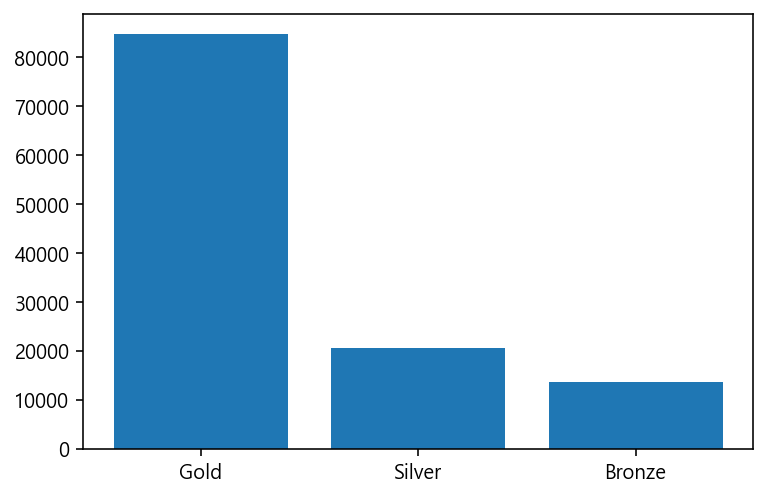

In [16]:
# 시각화
plt.bar(tmp['Class'], tmp['Score'])
plt.show()

- Gender 별 Score 평균을 집계하여 시각화합니다.

In [17]:
# 집계
tmp = customer.groupby(by='Gender', as_index=False)[['Score']].mean()

# 확인
tmp

,Gender,Score
0,female,44318.026059
1,male,25539.928322


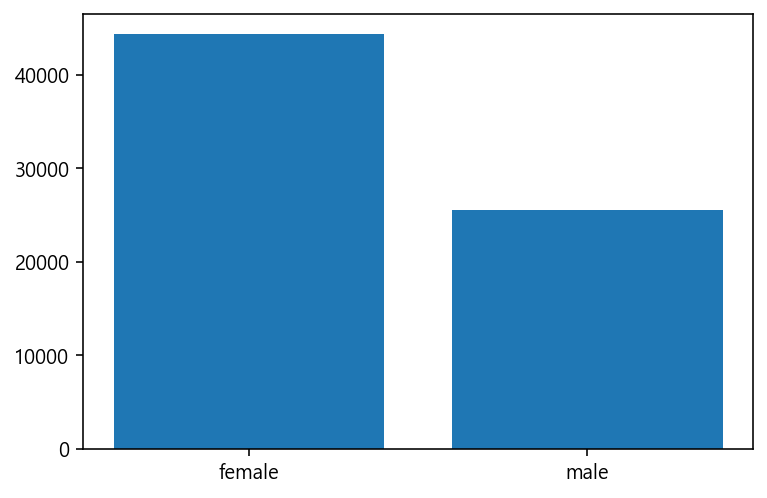

In [18]:
# 시각화
plt.bar(tmp['Gender'], tmp['Score'])
plt.show()

### 10. 데이터 정렬

- 데이터를 정렬하여 확인하고 시각화합니다.
- 먼저 Score 열을 기준으로 내림차순 정렬해 상위 10개 행만 추출합니다.

In [19]:
# score top 10
score_top10 = customer.sort_values(by='Score', ascending=False).head(10)

# 확인
score_top10

,CustomerCD,Class,Score,CustomerName,Gender,Age,City,BirthYear,BirthMonth,BirthDay
784,CT1738,Gold,512284,"Lesurer, Mr. Gustave J",male,45.0,Cherbourg,1978,3,28
690,CT1259,Gold,512284,"Ward, Miss. Anna",female,45.0,Cherbourg,1978,3,28
772,CT1680,Gold,512283,"Cardeza, Mr. Thomas Drake Martinez",male,46.0,Cherbourg,1977,4,6
20,CT1028,Gold,262971,"Fortune, Mr. Charles Alexander",male,29.0,Southhampton,1993,10,31
59,CT1089,Gold,262967,"Fortune, Miss. Mabel Helen",female,33.0,Southhampton,1989,12,7
242,CT1342,Gold,262966,"Fortune, Miss. Alice Elizabeth",female,34.0,Southhampton,1988,12,16
313,CT1439,Gold,262926,"Fortune, Mr. Mark",male,74.0,Southhampton,1949,12,21
703,CT1312,Gold,262347,"Ryerson, Miss. Emily Borie",female,28.0,Cherbourg,1994,10,22
785,CT1743,Gold,262344,"Ryerson, Miss. Susan Parker ""Suzette""",female,31.0,Cherbourg,1991,11,19
667,CT1119,Gold,247486,"Baxter, Mr. Quigg Edmond",male,34.0,Cherbourg,1988,12,16


- 예쁜 데이터를 만들기 위해 인덱스를 초기화합니다.

In [20]:
# 인덱스 초기화
score_top10.reset_index(drop=True, inplace=True)

# 확인
score_top10

,CustomerCD,Class,Score,CustomerName,Gender,Age,City,BirthYear,BirthMonth,BirthDay
0,CT1738,Gold,512284,"Lesurer, Mr. Gustave J",male,45.0,Cherbourg,1978,3,28
1,CT1259,Gold,512284,"Ward, Miss. Anna",female,45.0,Cherbourg,1978,3,28
2,CT1680,Gold,512283,"Cardeza, Mr. Thomas Drake Martinez",male,46.0,Cherbourg,1977,4,6
3,CT1028,Gold,262971,"Fortune, Mr. Charles Alexander",male,29.0,Southhampton,1993,10,31
4,CT1089,Gold,262967,"Fortune, Miss. Mabel Helen",female,33.0,Southhampton,1989,12,7
5,CT1342,Gold,262966,"Fortune, Miss. Alice Elizabeth",female,34.0,Southhampton,1988,12,16
6,CT1439,Gold,262926,"Fortune, Mr. Mark",male,74.0,Southhampton,1949,12,21
7,CT1312,Gold,262347,"Ryerson, Miss. Emily Borie",female,28.0,Cherbourg,1994,10,22
8,CT1743,Gold,262344,"Ryerson, Miss. Susan Parker ""Suzette""",female,31.0,Cherbourg,1991,11,19
9,CT1119,Gold,247486,"Baxter, Mr. Quigg Edmond",male,34.0,Cherbourg,1988,12,16


- 고객(CustomerCD)별 점수(Score)를 막대그래프로 시각화합니다.
- 단, 값이 상당히 크다고 가정하고 1,000으로 나눈 값을 시각화합니다.

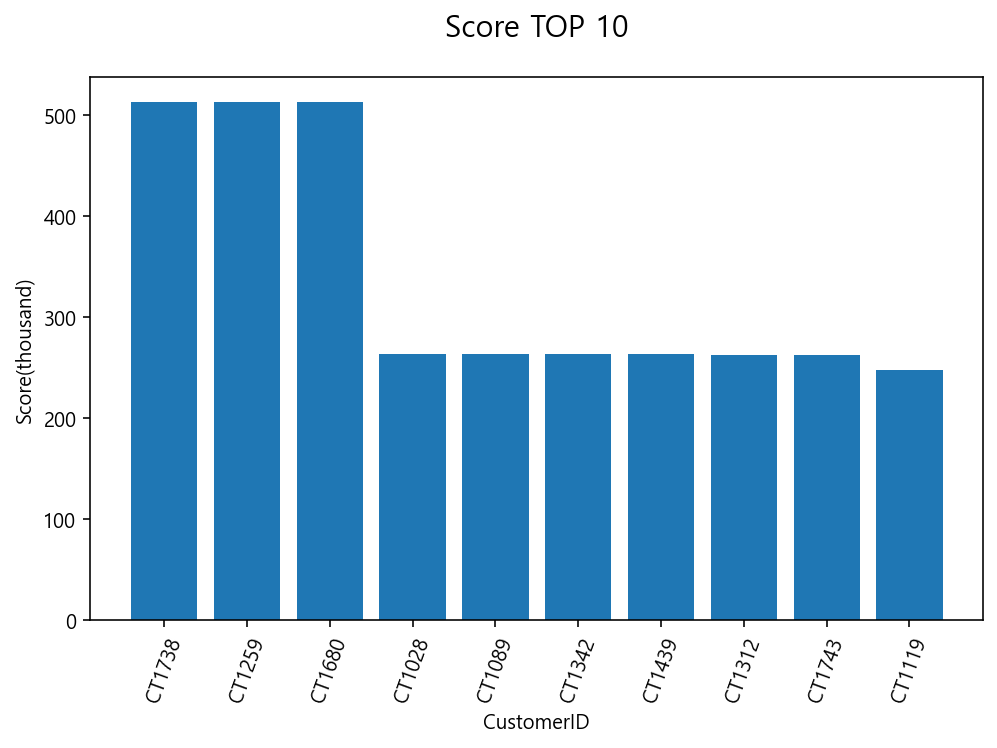

In [21]:
# 시각화
plt.figure(figsize=(8, 5))
plt.bar(score_top10['CustomerCD'], score_top10['Score'] / 1000)
plt.title('Score TOP 10', size=15, pad=20)
plt.xticks(rotation=70)
plt.xlabel('CustomerID')
plt.ylabel('Score(thousand)')
plt.show()

### 11. 등급 추가

- 다음 기준으로 새로운 등급을 갖는 Level 열을 추가합니다.
    - Score <= 7,000 : E
    - 7,000 < Score <= 20,000 : D
    - 20,000 < Score <= 40,000 : C
    - 40,000 < Score <= 80,000 : B
    - 80,000 < Score : A

In [22]:
# Level 추가
my_bin = [-np.inf, 7000, 20000, 40000, 80000, np.inf]
my_label = ['E', 'D', 'C', 'B', 'A']
customer['Level'] = pd.cut(customer['Score'], bins=my_bin, labels=my_label)

# 확인
customer.head()

,CustomerCD,Class,Score,CustomerName,Gender,Age,City,BirthYear,BirthMonth,BirthDay,Level
0,CT1001,Bronze,7218,"Braund, Mr. Owen Harris",male,32.0,Southhampton,1990,11,28,D
1,CT1003,Bronze,7889,"Heikkinen, Miss. Laina",female,36.0,Southhampton,1987,1,4,D
2,CT1004,Gold,53055,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,45.0,Southhampton,1978,3,28,B
3,CT1005,Bronze,8005,"Allen, Mr. William Henry",male,45.0,Southhampton,1978,3,28,D
4,CT1007,Gold,51798,"McCarthy, Mr. Timothy J",male,64.0,Southhampton,1959,9,20,B


- Level 별로 몇 명씩 포함하고 있는지 확인합니다.

In [23]:
# 범주값 확인
customer['Level'].value_counts()

D    481
C    197
B     98
A     74
E     29
Name: Level, dtype: int64